In [1]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [2]:
def game(ra, rb):
    #Calculating probability of each player winning the game
    p_a_wins = ra / (ra + rb)
    p_b_wins = rb / (ra + rb)
    #Keeping a count of the score
    score_a = 0
    score_b = 0
    #Checks whether the win condition has been met
    while not((score_a >= 11 and score_a - score_b >= 2) or (score_b >= 11 and score_b - score_a >= 2)):
        #Stores the result of the winner of a rally
        result = random.choices(["a", "b"], [p_a_wins, p_b_wins])[0]
        if result == "a":
            score_a += 1
        elif result == "b":
            score_b += 1
    return (score_a, score_b)

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [3]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [4]:
def win_probability_game(ra, rb, simulations):
    number_of_wins = 0
    for i in range(simulations):
        result = game(ra, rb)
        #Checks if player a won the game
        if result[0] > result[1]:
            number_of_wins += 1
    return number_of_wins / simulations


**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [5]:
# Print win_probability_game(70, 30, print(round(winProbability(70, 30), 2))) to 2 decimal places for a suitable value of n
print(round(win_probability_game(70, 30, 10000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [6]:
def read_abilities(file): # HINT: what should the argument be?
    abilities_list = []
    with open(file, "r") as test:
        abilities = csv.reader(test)
        for row in abilities:
            #Stops the first row in the csv file that contains string to be added to the list
            try:
                abilities_list.append((int(row[0]), int(row[1])))
            except ValueError:
                pass
    return abilities_list
        

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [7]:
# Print the result of calling the function for the file `test.csv`
read_abilities("test.csv")

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [8]:
def plot_win_probabilities(abilities_list): # HINT: what should the argument be?
    p_a_wins = []
    ra_over_rb = []
    for pair in abilities_list:
        p_a_wins.append(round(win_probability_game(pair[0], pair[1], 1000), 2))
        ra_over_rb.append(round(pair[0] / pair[1] , 2))
    plt.scatter(ra_over_rb, p_a_wins)
    plt.xlabel("ra/rb")
    plt.ylabel("Probability a wins")
    plt.show()


**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


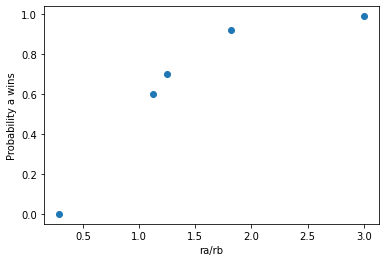

In [9]:
# Call the function to plot the figure here
plot_win_probabilities([(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)])

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [10]:
def win_probability_match(ra, rb, simulations, m):
    number_of_wins = 0
    #Simulating the number of matches in a for loop
    for i in range(simulations):
        #Storing how many games a player has won
        a_wins = 0
        b_wins = 0
        #Simulating games until a player has won enough to win the match
        while a_wins != m and b_wins != m:
            result = game(ra, rb)
            if result[0] > result[1]:
                a_wins += 1
            else:
                b_wins += 1
        #If a wins the match, the number of match wins for a increases by one
        if a_wins > b_wins:
            number_of_wins += 1
    return number_of_wins / simulations
            
        
# Calculate lowest value of m here
m = 0
while win_probability_match(60, 40, 500, m) < 0.9:
    m += 1
print(m)

2


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

I am investigating whether the English or the PARS scoring system is the better method for scoring games of squash. These methods are commonly used to score games of squash so I decided to compare the probability of winning a match given a player's level of ability. The better system will be the system that is more skill dependent. This will be determined by comparing the probability of winning a match given a player's ability with both scoring systems. My prediction is that the PARS system will be better because players are able to win points whether they are the server or the returner meaning that the chance of scoring a point is dependent on the player's ability as the server and returner. The player also needs to be ahead by two points to win the game unlike the English system where there is a fixed number of points required to win the game. The better player should ideally be ahead of the opponent by more than one point.

## Method

To determine which system is better, I will be simulating matches of squash. Firstly, I need to represent a player's ability by using an integer between 0 and 100. Then, the probability of a player winning a point will be calculated by dividing one player's ability by the sum of the abilities of both players. The probabilities will then be used to determine which player earns the point and this will continue until the win conditions are met. I will then measure the probability of winning a match given a player's ability by dividing the number of matches a player has won by the number of matches simulated. I will be changing one of the players' ability throughout the simulations from 0 to 100 and I will be keeping the other players' ability the same at 50 to measure whether the probability is lower or higher when the player's ability is lower and higher in comparison.

In [11]:
#PARS Scoring System
def pars_game(ra, rb):
    #Calculating probability of each player winning the game
    p_a_wins = ra / (ra + rb)
    p_b_wins = rb / (ra + rb)
    #Keeping a count of the score
    score_a = 0
    score_b = 0
    #Checks whether the win condition has been met
    while not((score_a >= 11 and score_a - score_b >= 2) or (score_b >= 11 and score_b - score_a >= 2)):
        #Stores the result of the winner of a rally
        result = random.choices(["a", "b"], [p_a_wins, p_b_wins])[0]
        if result == "a":
            score_a += 1
        elif result == "b":
            score_b += 1
    return (score_a, score_b)

#English scoring system - Start coding on this next time
def english_game(ra, rb):
    #Calculating probability of each player winning the game
    p_a_wins = ra / (ra + rb)
    p_b_wins = rb / (ra + rb)
    #Keeping a count of the score
    score_a = 0
    score_b = 0
    #Deciding who the server is
    server = random.choice(["a", "b"])
    if server == "a":
        a_is_server = True
        b_is_server = False
    elif server == "b":
        b_is_server = True
        a_is_server = False
    #Checks whether the win condition has been met
    while score_a != 9 and score_b != 9:
        #Checks if the players have both reached 8 points
        if score_a == 8 and score_b == 8:
            end_score = random.choice([9, 10])
            while score_a != end_score and score_b != end_score:
                if result == "a":
                    if a_is_server:
                        score_a += 1
                    else:
                        a_is_server, b_is_server = b_is_server, a_is_server
                elif result == "b":
                    if b_is_server:
                        score_b += 1
                    else:
                        a_is_server, b_is_server = b_is_server, a_is_server
            break
        #Stores the result of the winner of a rally
        result = random.choices(["a", "b"], [p_a_wins, p_b_wins])[0]
        #Checking if the player who scored is the server and giving them a point if they are
        if result == "a":
            if a_is_server:
                score_a += 1
            else:
                a_is_server, b_is_server = b_is_server, a_is_server
        elif result == "b":
            if b_is_server:
                score_b += 1
            else:
                a_is_server, b_is_server = b_is_server, a_is_server
    return (score_a, score_b)

def win_probability_match(ra, rb, simulations, m, game):
    number_of_wins = 0
    #Simulating the number of matches in a for loop
    for i in range(simulations):
        #Storing how many games a player has won
        a_wins = 0
        b_wins = 0
        #Simulating games until a player has won enough to win the match
        if game == "PARS":
            while a_wins != m and b_wins != m:
                result = pars_game(ra, rb)
                if result[0] > result[1]:
                    a_wins += 1
                else:
                    b_wins += 1
        elif game == "English":
            while a_wins != m and b_wins != m:
                result = english_game(ra, rb)
                if result[0] > result[1]:
                    a_wins += 1
                else:
                    b_wins += 1
        #If a wins the match, the number of match wins for a increases by one
        if a_wins > b_wins:
            number_of_wins += 1
    return number_of_wins / simulations


## Assumptions

I have made the assumption that a player's ability can be modelled using an integer between 0 and 100. Therefore, the simulations are less likely to represent a real game making the results less reliable. I assumed that a player's ability would not change throughout the simulations. While the simulations are less likely to represent a real game, this assumption allows a player's ability to act as an average representation throughout a game, which should make the results more reliable. I also assumed that the player's ability as a server and a returner is the same. A player should normally have an advantage as a server so my simulations will not represent this which consequently, makes the results less reliable.

# Results

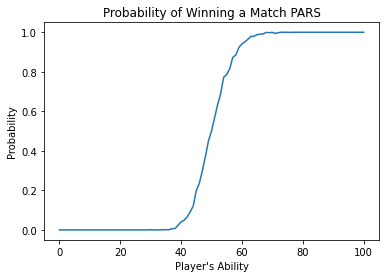

In [12]:
pars_probability = [win_probability_match(i, 50, 1000, 10, "PARS") for i in range(101)]
pars_abilities = [i for i in range(101)]
plt.plot(pars_abilities, pars_probability)
plt.title('Probability of Winning a Match PARS')
plt.xlabel("Player's Ability")
plt.ylabel("Probability")
plt.show()

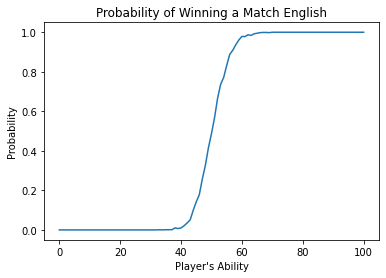

In [13]:
english_probability = [win_probability_match(i, 50, 1000, 10, "English") for i in range(101)]
english_abilities = [i for i in range(101)]
plt.plot(english_abilities, english_probability)
plt.title('Probability of Winning a Match English')
plt.xlabel("Player's Ability")
plt.ylabel("Probability")
plt.show()

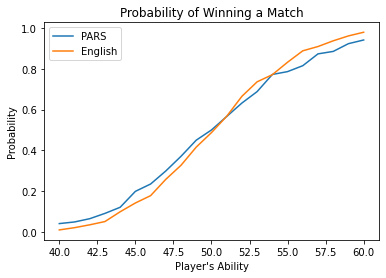

In [14]:
plt.plot(pars_abilities[40:61], pars_probability[40:61], label="PARS")
plt.plot(english_abilities[40:61], english_probability[40:61], label="English")
plt.title('Probability of Winning a Match')
plt.xlabel("Player's Ability")
plt.ylabel("Probability")
plt.legend()
plt.show()

I ran simulations for the PARS and the English system and I plotted both results on graphs. Both of these graphs look similar when all points have been plotted. The only noticeable part of both graphs are between the abilities 40 and 60. The graph before  40 shows that the chance of winning a match is zero. The graph after 60 shows that the player's chance of winning is close to 100%. The probability starts increasing when the ability goes above 40 and peaks after 60. This suggests that both players have a chance of winning when the difference between the abilities is less than ten. I used the results between the abilities 40 and 60 to plot another graph. From the new graph, it is evident that the chance of a player winning with the English system is lower than the PARS system below 50 and is usually higher above 50.

## Conclusions

I simulated matches of squash with the English and the PARS system to determine which system is better. I created functions that simulate matches of squash to find the probability of winning a match given a player's ability. In conclusion, the English system is better than the PARS system. From my results, it is evident that the better player is more likely to win with the English system. The way the player's ability has been modelled has affected the output because it is hard to measure a player's ability just by using numbers. The player's ability can be affected by other factors like the player's stamina and how well the player is feeling during the match. To improve, I could find a better way to model the player's ability and implement a way to have a player's ability change throughout a game. This would make the results more representative of a real game.